In [5]:
from pandas import*
import pandas
# import matplotlib as mpl
import numpy as np
import math
import sys
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt

reload(sys) 
sys.setdefaultencoding('utf8')
sys.getdefaultencoding()

%matplotlib inline

In [6]:
h2w = read_csv('h2w.csv')
points = read_csv('points.csv')

In [7]:
h2w.head()

,OBJECTID,GRID_ID_H,GRID_ID_W,HOME_NUM,RANDINT
0,1,80801,77824,3,83
1,2,82503,88376,3,43
2,3,89421,94346,3,59
3,4,84083,84083,889,93
4,5,84878,62532,5,8


In [8]:
points.head()

,OBJECTID,grid_id,ORIG_FID,PX,PY,new_grid_id
0,1,0.0,1,550878.022222,317245.787834,0
1,2,1.0,2,551094.771754,317246.788576,1
2,3,2.0,3,550660.283339,317460.448051,2
3,4,3.0,4,550877.028607,317461.444588,3
4,5,4.0,5,551093.773916,317462.445370,4


In [9]:
p = points[['PX','PY','new_grid_id']]
h2w_xy = merge(left=h2w, right=p, left_on='GRID_ID_H', right_on='new_grid_id', how='left')
h2w_xy = merge(left=h2w_xy, right=p, left_on='GRID_ID_W', right_on='new_grid_id', how='left')
# del h2w_xy[['new_grid_id_x', 'new_grid_id_y']]
del h2w_xy['new_grid_id_x']
del h2w_xy['new_grid_id_y']
h2w_xy.head()


,OBJECTID,GRID_ID_H,GRID_ID_W,HOME_NUM,RANDINT,PX_x,PY_x,PX_y,PY_y
0,1,80801,77824,3,83,515239.467376,382505.130586,518259.101134,380580.221505
1,2,82503,88376,3,43,521054.625836,383586.822058,519755.322722,387227.908649
2,3,89421,94346,3,59,512647.686996,387860.011772,502525.710678,390638.027221
3,4,84083,84083,889,93,502742.591773,384638.211719,502742.591773,384638.211719
4,5,84878,62532,5,8,524713.537480,385095.050538,539842.446702,371414.225199


In [10]:
def calculate_distance(row):
    h_x, h_y, w_x, w_y = row.PX_x, row.PY_x, row.PX_y, row.PY_y
    return math.sqrt((h_x - w_x)**2 + (h_y - w_y)**2)

In [11]:
h2w_xy['distance'] = h2w_xy.apply(calculate_distance, axis=1)
h2w_xy['distance2'] = ((h2w_xy.PX_x - h2w_xy.PX_y)**2 + (h2w_xy.PY_x - h2w_xy.PY_y)**2)**0.5
h2w_xy.head()

,OBJECTID,GRID_ID_H,GRID_ID_W,HOME_NUM,RANDINT,PX_x,PY_x,PX_y,PY_y,distance,distance2
0,1,80801,77824,3,83,515239.467376,382505.130586,518259.101134,380580.221505,3580.986316,3580.986316
1,2,82503,88376,3,43,521054.625836,383586.822058,519755.322722,387227.908649,3865.966909,3865.966909
2,3,89421,94346,3,59,512647.686996,387860.011772,502525.710678,390638.027221,10496.274311,10496.274311
3,4,84083,84083,889,93,502742.591773,384638.211719,502742.591773,384638.211719,0.000000,0.000000
4,5,84878,62532,5,8,524713.537480,385095.050538,539842.446702,371414.225199,20397.276196,20397.276196


In [12]:
h2w_xy.head()

,OBJECTID,GRID_ID_H,GRID_ID_W,HOME_NUM,RANDINT,PX_x,PY_x,PX_y,PY_y,distance,distance2
0,1,80801,77824,3,83,515239.467376,382505.130586,518259.101134,380580.221505,3580.986316,3580.986316
1,2,82503,88376,3,43,521054.625836,383586.822058,519755.322722,387227.908649,3865.966909,3865.966909
2,3,89421,94346,3,59,512647.686996,387860.011772,502525.710678,390638.027221,10496.274311,10496.274311
3,4,84083,84083,889,93,502742.591773,384638.211719,502742.591773,384638.211719,0.000000,0.000000
4,5,84878,62532,5,8,524713.537480,385095.050538,539842.446702,371414.225199,20397.276196,20397.276196


In [14]:
sum(h2w_xy['HOME_NUM'] * h2w_xy['distance']) / sum(h2w_xy['HOME_NUM'])

6371.9203093472224

In [32]:
grid_mean_distance = h2w_xy.groupby('GRID_ID_H')['distance'].mean()

In [33]:
grid_mean_distance.head()

GRID_ID_H
17     29451.491966
69     27287.311174
97     35821.089555
182        0.000000
190    15724.667633
Name: distance, dtype: float64

In [34]:
points['distance'] = grid_mean_distance
points.head()

,OBJECTID,grid_id,ORIG_FID,PX,PY,new_grid_id,distance
0,1,0.0,1,550878.022222,317245.787834,0,NaN
1,2,1.0,2,551094.771754,317246.788576,1,NaN
2,3,2.0,3,550660.283339,317460.448051,2,NaN
3,4,3.0,4,550877.028607,317461.444588,3,NaN
4,5,4.0,5,551093.773916,317462.445370,4,NaN


In [35]:
points['distance'] = points['distance'].fillna(0)
points.head()

,OBJECTID,grid_id,ORIG_FID,PX,PY,new_grid_id,distance
0,1,0.0,1,550878.022222,317245.787834,0,0.0
1,2,1.0,2,551094.771754,317246.788576,1,0.0
2,3,2.0,3,550660.283339,317460.448051,2,0.0
3,4,3.0,4,550877.028607,317461.444588,3,0.0
4,5,4.0,5,551093.773916,317462.445370,4,0.0


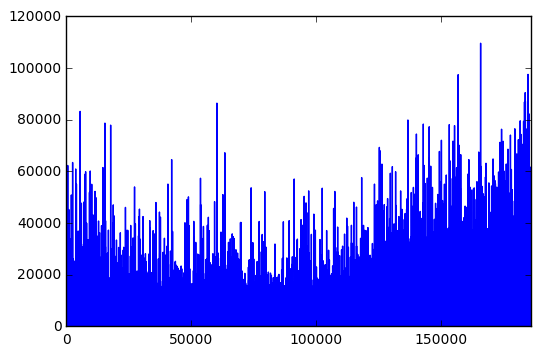

In [36]:
points.distance.plot()

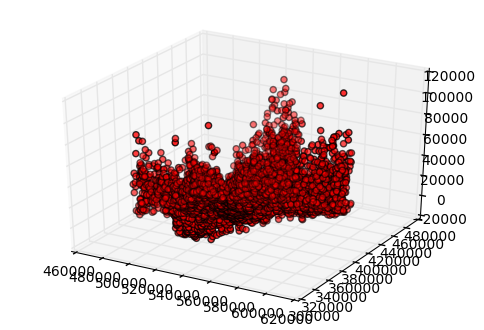

In [37]:
x,y,z = points[points.distance > 0]['PX'], points[points.distance > 0]['PY'], points[points.distance > 0]['distance']
ax=plt.subplot(111,projection='3d') #创建一个三维的绘图工程
ax.scatter(x,y,z,c='r')

In [41]:
points["str"] = "haha_h"

In [42]:
points.head()

,OBJECTID,grid_id,ORIG_FID,PX,PY,new_grid_id,distance,str
0,1,0.0,1,550878.022222,317245.787834,0,0.0,haha_h
1,2,1.0,2,551094.771754,317246.788576,1,0.0,haha_h
2,3,2.0,3,550660.283339,317460.448051,2,0.0,haha_h
3,4,3.0,4,550877.028607,317461.444588,3,0.0,haha_h
4,5,4.0,5,551093.773916,317462.445370,4,0.0,haha_h


In [53]:
points["str"].str.split("_")


0         [haha, h]
1         [haha, h]
2         [haha, h]
3         [haha, h]
4         [haha, h]
5         [haha, h]
6         [haha, h]
7         [haha, h]
8         [haha, h]
9         [haha, h]
10        [haha, h]
11        [haha, h]
12        [haha, h]
13        [haha, h]
14        [haha, h]
15        [haha, h]
16        [haha, h]
17        [haha, h]
18        [haha, h]
19        [haha, h]
20        [haha, h]
21        [haha, h]
22        [haha, h]
23        [haha, h]
24        [haha, h]
25        [haha, h]
26        [haha, h]
27        [haha, h]
28        [haha, h]
29        [haha, h]
            ...    
185894    [haha, h]
185895    [haha, h]
185896    [haha, h]
185897    [haha, h]
185898    [haha, h]
185899    [haha, h]
185900    [haha, h]
185901    [haha, h]
185902    [haha, h]
185903    [haha, h]
185904    [haha, h]
185905    [haha, h]
185906    [haha, h]
185907    [haha, h]
185908    [haha, h]
185909    [haha, h]
185910    [haha, h]
185911    [haha, h]
185912    [haha, h]


In [49]:
"aa_a".split("_")

['aa', 'a']